# データ可視化によるデータ性状の理解

1. データを観察することで、どのような解析が望ましいか事前に理解する

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

from rdkit import Chem
from rdkit.Chem.Descriptors import descList

mpl.rcParams['font.family'] = 'MS Gothic'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = [10, 10]

[Scatter matrix](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html?highlight=visualization#scatter-matrix-plot)

## 化合物データに対する可視化

- RDKit記述子の傾向を見てみる

In [15]:
import pandas as pd 
df = pd.read_csv('../data/delaney-solubility/delaney-processed.csv')
df.head(3)

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)


In [16]:
df['mol']=df['smiles'].apply(Chem.MolFromSmiles)

In [17]:
names = list(dict(descList).keys())
names

['MaxAbsEStateIndex',
 'MaxEStateIndex',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'AvgIpc',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VS

In [18]:
df_rdkit = pd.DataFrame([list(map(lambda f:f(m), list(dict(descList).values())))
               for m in df['mol']], columns=names)

In [19]:
is_selected = np.logical_and(df_rdkit.var()>0, df_rdkit.var() <= 100)

TARGET = is_selected.keys().tolist()[:10]

c:\Users\Matsunami\anaconda3\envs\cheminformatics\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\Matsunami\anaconda3\envs\cheminformatics\lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\Matsunami\anaconda3\envs\cheminformatics\lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


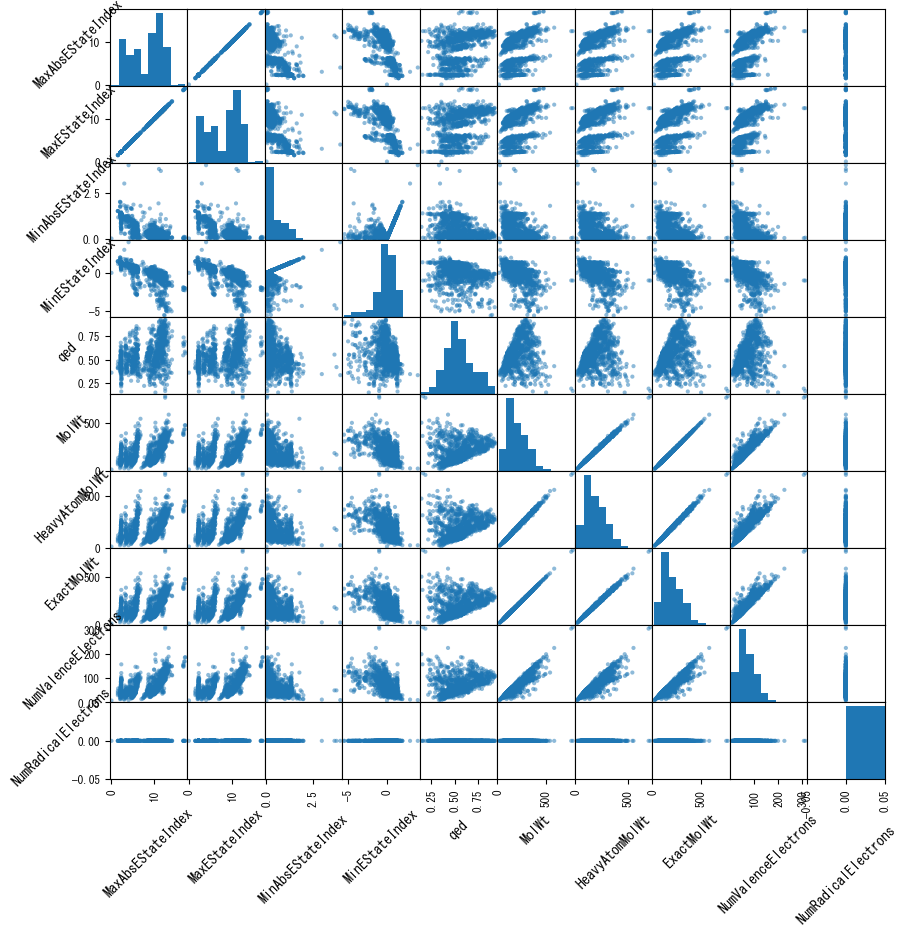

In [31]:
from pandas.plotting import scatter_matrix

sm = scatter_matrix(df_rdkit[TARGET], figsize=(10,10))
plt.rcParams['font.size'] = 10

[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(45) for s in sm.reshape(-1)]

plt.savefig('../results/eda/rdkit_scatter_mat.png')
plt.show()

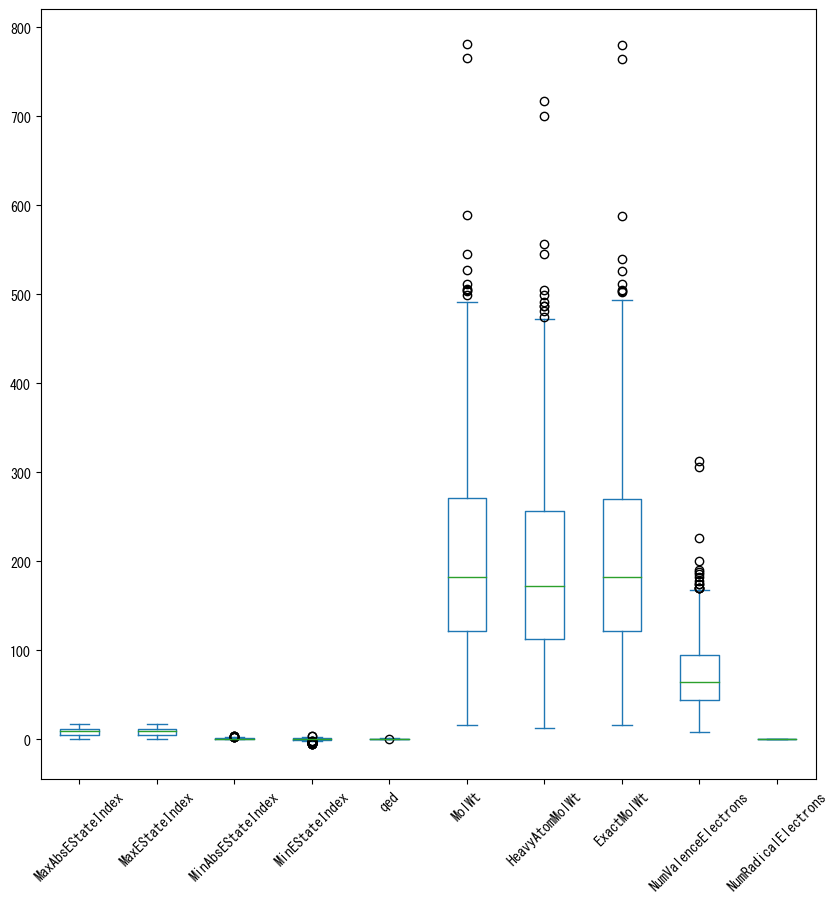

In [30]:
df_rdkit[TARGET].plot.box(rot=45)
plt.savefig('../results/eda/rdkit_box.png')